# Bankrupcy challenge

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# optional
import seaborn as sns; sns.set()

## Insertion des données

In [41]:
train = pd.read_table("../Data_competition/X_train.txt", sep=',',header=None)
test = pd.read_table("../Data_competition/X_test.txt",sep=',',header=None)
cible=pd.read_table("../Data_competition/y_train.txt",sep=',',header=None)
header=pd.read_csv("../Data_competition/header.csv",sep=',',header=None)

In [14]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.491722,1.264287,-0.158577,-0.150768,1.087627,0.157166,-1.053879,-1.116961,NaN,NaN,NaN,NaN,NaN,-0.235758,NaN,NaN,0.107888,NaN,NaN,-0.047326,-0.399256,0.024927,NaN,NaN,NaN,NaN,NaN,0.164409,NaN,NaN,0.066269,NaN,NaN,NaN,NaN,NaN,NaN,-0.262937,NaN,NaN,0.887558,NaN,NaN,NaN,NaN,NaN,5.284473,NaN,NaN,NaN,2011.0
1,-0.249351,0.046088,-0.040435,0.105421,-1.098919,0.289237,-0.338154,0.129297,0.807200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008015,-0.736507,NaN,-0.417189,NaN,NaN,NaN,-0.657171,NaN,NaN,NaN,NaN,0.445685,NaN,NaN,NaN,NaN,-0.329228,NaN,NaN,NaN,NaN,0.468655,NaN,0.527339,-0.291376,NaN,NaN,NaN,NaN,NaN,2011.0
2,0.986824,-0.189678,0.059693,0.010147,0.777260,-1.051633,-1.011747,-0.756690,NaN,0.874877,-0.273440,0.086508,0.688904,0.011214,NaN,NaN,-0.327590,NaN,0.154479,NaN,0.956582,NaN,NaN,NaN,1.195586,NaN,NaN,NaN,NaN,NaN,0.286557,NaN,NaN,-1.309222,NaN,0.296849,0.264740,NaN,0.513461,NaN,0.404907,-0.271227,NaN,0.995816,0.004617,0.48018,NaN,-0.105363,NaN,NaN,2011.0
3,-0.265990,-0.517960,-0.114526,-0.073818,1.889234,-0.161217,-0.947844,-0.650268,-0.712451,NaN,0.126789,0.596843,NaN,NaN,NaN,NaN,NaN,NaN,-0.081760,NaN,NaN,NaN,-0.455399,-0.077836,NaN,0.271222,NaN,NaN,NaN,0.465727,NaN,NaN,NaN,-1.189501,NaN,NaN,NaN,NaN,NaN,0.117178,NaN,NaN,-0.378151,NaN,NaN,NaN,NaN,NaN,-0.755457,-0.526293,2011.0
4,0.199900,-0.095447,0.263825,0.040790,-1.125166,-1.318912,-0.887661,-1.202686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.624526,0.983099,-1.652295,NaN,NaN,NaN,NaN,NaN,-2.776458,-0.118833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.424390,-0.568337,-0.180425,NaN,NaN,NaN,NaN,NaN,NaN,-0.535741,2011.0


In [21]:
header.drop(header.columns[[2]], axis=1)

,0,1,3
0,0,Liquidity,NaN
1,1,x1,(Cash+Mark.Sec)/Current Liabilities
2,2,x2,(Cash+Mark.Sec)/Total Sales
3,3,x3,Cash/Current Assets
4,4,x4,Cash/Total Assets
5,5,x5,Current Assets/Current Liabilities
6,6,x6,Current Assets/Total Assets
7,7,x7,Current Liabilities/Total Assets
8,8,x8,Current Liabilities/Total Sales
9,9,x9,Inventories/Total Assets


In [133]:
feature_name=header.drop(header.columns[[2]], axis=1)
feature_name=feature_name.drop(feature_name.index[[56,49,30,20,14,0,38]])[3]
feature_name
feature_name2=header.drop(header.columns[[2]], axis=1)
feature_name2=feature_name2.drop(feature_name2.index[[56,49,30,20,14,0,38]])[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114681b38>]], dtype=object)

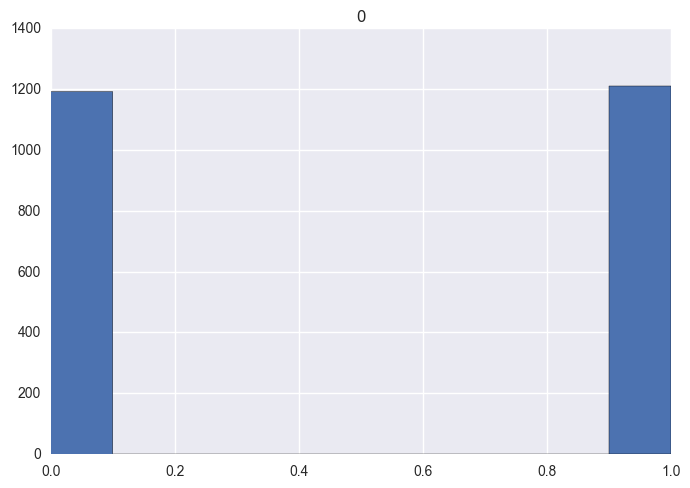

In [44]:
cible.hist()

In [89]:
train.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,720.000000,693.000000,703.000000,716.000000,737.000000,711.000000,703.000000,716.000000,717.000000,719.000000,694.000000,704.000000,756.000000,734.000000,728.000000,774.000000,748.000000,724.000000,683.000000,758.000000,710.000000,723.000000,712.000000,710.000000,760.000000,692.000000,666.000000,709.000000,718.000000,735.000000,760.000000,714.000000,694.000000,723.000000,721.000000,708.000000,717.000000,742.000000,712.000000,700.000000,667.000000,748.000000,2400.000000
mean,0.031864,-0.059657,0.007929,0.041124,0.046468,0.011397,0.094027,0.054778,-0.050546,-0.012191,-0.037682,-0.067948,-0.042309,0.009347,-0.019924,-0.278407,-0.062829,-0.008491,-0.055776,0.101447,-0.008943,-0.045357,-0.068847,-0.063680,0.021430,0.026256,-0.040328,0.035157,-0.024672,-0.089145,-0.043660,0.011278,-0.055222,0.017457,0.026881,0.035455,0.020356,0.003655,-0.046695,-0.064039,0.027197,0.634564,-0.027732,0.048335,0.053927,0.175336,0.077724,-0.043947,-0.028917,0.146608,2011.166250
std,1.015507,1.779440,0.926326,0.961160,0.993698,1.003920,1.717822,1.447820,0.921946,1.073874,0.966300,1.213307,1.217618,0.115424,1.240191,7.532968,1.087344,0.930318,1.321138,1.391525,0.953015,1.229643,1.022798,1.398496,0.892930,1.091386,0.961931,0.974159,1.053540,1.804774,0.934597,1.078876,1.958331,0.927468,1.964622,0.936371,0.935959,1.062705,1.179836,1.259029,0.822584,4.228707,0.982237,0.996181,1.131588,2.656971,1.093843,1.418621,0.995832,1.677279,0.372382
min,-0.798437,-31.253188,-2.975392,-6.152910,-1.303994,-1.752056,-1.154813,-1.285662,-4.409318,-0.901966,-2.263210,-14.051665,-12.412256,-1.528569,-13.406921,-199.107717,-15.107880,-24.466308,-30.004218,-6.942546,-5.659204,-5.738854,-4.993776,-22.033475,-6.293568,-7.326744,-5.803039,-4.860888,-0.944918,-36.457381,-3.514299,-11.490912,-43.610719,-1.419095,-6.735396,-5.163526,-5.457975,-9.407212,-8.279245,-14.372581,-5.140668,-7.961143,-2.199325,-5.536119,-5.397078,-1.391778,-2.863965,-24.694781,-2.301071,-6.439614,2011.000000
25%,-0.695475,-0.597372,-0.160990,-0.150768,-0.764668,-0.908911,-0.784649,-0.667014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000
50%,-0.222866,-0.425678,-0.087573,-0.038927,0.015150,0.065601,-0.257946,-0.320275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000
75%,0.315059,0.215943,0.131986,0.293186,0.427824,0.898559,0.549836,0.294363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000
max,14.455940,58.361427,15.981993,5.580785,11.641128,1.640904,50.639232,38.620603,4.955805,12.499440,2.959956,1.855578,12.415090,0.805941,5.390807,16.534013,10.894140,1.244569,5.117303,25.240457,3.826038,10.638135,4.176700,10.199614,5.941123,7.571282,3.579924,6.603615,5.411638,2.629446,3.336163,1.665148,4.829484,3.347599,41.777243,2.458077,3.476107,2.872041,11.966305,3.320162,2.525955,58.128478,11.285113,2.689493,9.054158,61.786803,7.784018,5.159752,8.134847,20.657985,2012.000000


## Analyse des Nan

In [28]:
train.shape

(2400, 51)

In [27]:
len(np.where(train.isnull())[0])

70621

On a beaucoup de valeurs manquantes. On va regarder la distribution de chacune de ces données

In [38]:
freqNan=100*train.isnull().sum()/2400

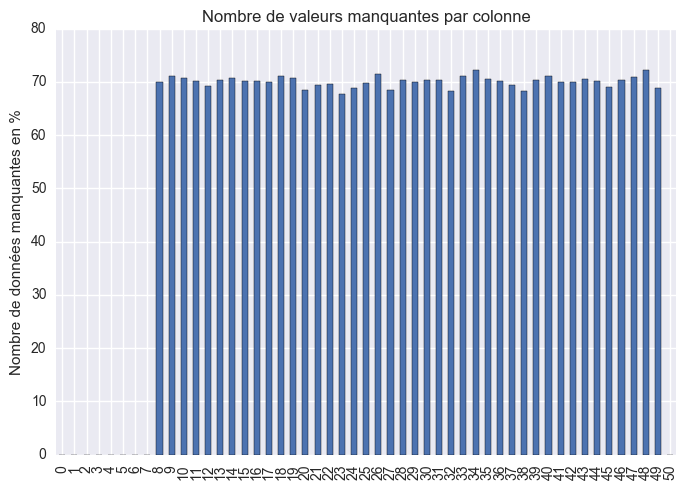

In [40]:
plt.figure()
freqNan.plot(kind='bar')
plt.ylabel('Nombre de données manquantes en %')
plt.title('Nombre de valeurs manquantes par colonne')

## Replace Nan by median and build first simple model and year by one hot

In [87]:
train_nan_replaced_median=train.fillna(train.median())

In [90]:
train_nan_replaced_median[50]=train_nan_replaced_median[50]-2011

In [92]:
train_nan_replaced_median.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.491722,1.264287,-0.158577,-0.150768,1.087627,0.157166,-1.053879,-1.116961,-0.331601,-0.321819,-0.448056,0.013183,-0.193155,-0.235758,0.091401,0.085931,0.107888,0.023385,-0.002589,-0.047326,-0.399256,0.024927,-0.037331,0.020699,-0.012932,0.257099,-0.020569,0.164409,-0.475648,0.168924,0.066269,0.193542,0.169604,-0.013150,0.203971,0.097764,0.072451,-0.262937,0.110893,0.200453,0.887558,-0.186897,-0.120427,0.012997,-0.123650,-0.241197,5.284473,0.053458,-0.212192,-0.154904,0.0
1,-0.249351,0.046088,-0.040435,0.105421,-1.098919,0.289237,-0.338154,0.129297,0.807200,-0.321819,-0.448056,0.013183,-0.193155,0.011214,0.091401,0.085931,-0.317019,0.023385,-0.002589,0.008015,-0.736507,0.216415,-0.417189,0.020699,-0.012932,0.257099,-0.657171,0.164993,-0.475648,0.168924,-0.095417,0.445685,0.169604,-0.013150,0.203971,0.097764,-0.329228,0.044793,0.110893,0.200453,0.120438,0.468655,-0.120427,0.527339,-0.291376,-0.241197,-0.397499,0.053458,-0.212192,-0.154904,0.0
2,0.986824,-0.189678,0.059693,0.010147,0.777260,-1.051633,-1.011747,-0.756690,-0.331601,0.874877,-0.273440,0.086508,0.688904,0.011214,0.091401,0.085931,-0.327590,0.023385,0.154479,0.214970,0.956582,0.216415,-0.037331,0.020699,1.195586,0.257099,-0.020569,0.164993,-0.475648,0.168924,0.286557,0.193542,0.169604,-1.309222,0.203971,0.296849,0.264740,0.044793,0.513461,0.200453,0.404907,-0.271227,-0.120427,0.995816,0.004617,0.480180,-0.397499,-0.105363,-0.212192,-0.154904,0.0
3,-0.265990,-0.517960,-0.114526,-0.073818,1.889234,-0.161217,-0.947844,-0.650268,-0.712451,-0.321819,0.126789,0.596843,-0.193155,0.011214,0.091401,0.085931,-0.317019,0.023385,-0.081760,0.214970,-0.055707,0.216415,-0.455399,-0.077836,-0.012932,0.271222,-0.020569,0.164993,-0.475648,0.465727,-0.095417,0.193542,0.169604,-1.189501,0.203971,0.097764,0.072451,0.044793,0.110893,0.117178,0.120438,-0.186897,-0.378151,0.012997,-0.123650,-0.241197,-0.397499,0.053458,-0.755457,-0.526293,0.0
4,0.199900,-0.095447,0.263825,0.040790,-1.125166,-1.318912,-0.887661,-1.202686,-0.331601,-0.321819,-0.448056,0.013183,-0.193155,0.011214,0.091401,0.085931,-0.317019,0.023385,-0.002589,0.214970,-0.055707,0.216415,-0.037331,2.624526,0.983099,-1.652295,-0.020569,0.164993,-0.475648,0.168924,-0.095417,-2.776458,-0.118833,-0.013150,0.203971,0.097764,0.072451,0.044793,0.110893,0.200453,-0.424390,-0.568337,-0.180425,0.012997,-0.123650,-0.241197,-0.397499,0.053458,-0.212192,-0.535741,0.0


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [94]:
tuned_parameters = [{'n_estimators': [10,30,50,100],
                     'max_depth': [10,30],
                     'criterion': ['gini','entropy'],
                     'max_features':[5,10,50]}]



clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,verbose=0)
clf.fit(train_nan_replaced_median, cible[0].values)


print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'max_depth': 30, 'criterion': 'entropy', 'n_estimators': 50, 'max_features': 10}

Grid scores on development set:

0.921 (+/-0.038) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 5}
0.939 (+/-0.045) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 30, 'max_features': 5}
0.944 (+/-0.037) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 50, 'max_features': 5}
0.946 (+/-0.033) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 5}
0.934 (+/-0.048) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 10}
0.943 (+/-0.050) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 30, 'max_features': 10}
0.945 (+/-0.032) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 50, 'max_features': 10}
0.947 (+/-0.039) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 10}
0.930 (+/-0.061) for {'max_depth': 10, 

On atteint 95% de précision de 5-CV folds avec un random forest de max_depth=30, de split entropy, avec 50 arbres et 10 features utilisées au maximum.

### Importance des variables

In [113]:
rf = RandomForestClassifier(max_depth=30,criterion='entropy',n_estimators=50,max_features=10)
rf.fit(train_nan_replaced_median, cible[0].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

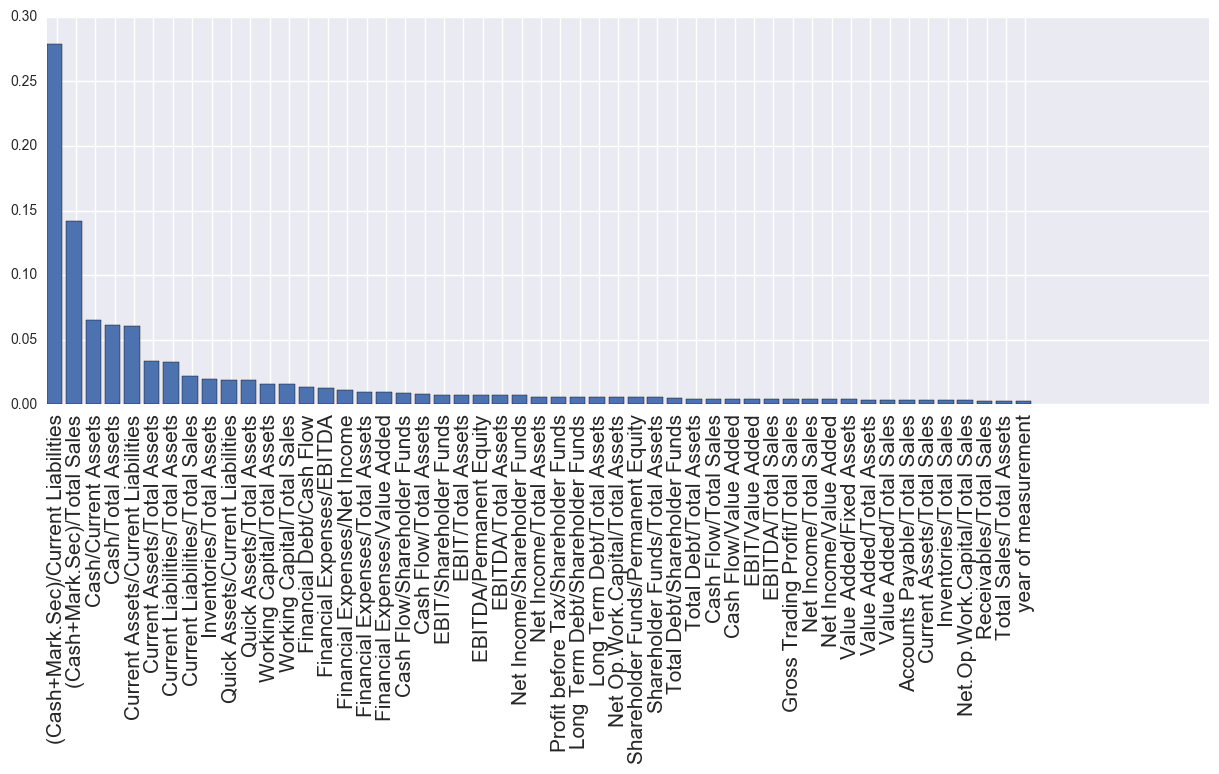

In [114]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(rf.feature_importances_)[::-1][:51]

importances_median = rf.feature_importances_[ordering]
feature_names = feature_name

x = np.arange(len(feature_names))
plt.bar(x, importances_median)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

## Replace Nan by mean and do the same 

In [108]:
train_nan_replaced_mean=train.fillna(train.mean())

In [109]:
train_nan_replaced_median[50]=train_nan_replaced_median[50]-2011
train_nan_replaced_median.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.491722,1.264287,-0.158577,-0.150768,1.087627,0.157166,-1.053879,-1.116961,-0.331601,-0.321819,-0.448056,0.013183,-0.193155,-0.235758,0.091401,0.085931,0.107888,0.023385,-0.002589,-0.047326,-0.399256,0.024927,-0.037331,0.020699,-0.012932,0.257099,-0.020569,0.164409,-0.475648,0.168924,0.066269,0.193542,0.169604,-0.013150,0.203971,0.097764,0.072451,-0.262937,0.110893,0.200453,0.887558,-0.186897,-0.120427,0.012997,-0.123650,-0.241197,5.284473,0.053458,-0.212192,-0.154904,-2011.0
1,-0.249351,0.046088,-0.040435,0.105421,-1.098919,0.289237,-0.338154,0.129297,0.807200,-0.321819,-0.448056,0.013183,-0.193155,0.011214,0.091401,0.085931,-0.317019,0.023385,-0.002589,0.008015,-0.736507,0.216415,-0.417189,0.020699,-0.012932,0.257099,-0.657171,0.164993,-0.475648,0.168924,-0.095417,0.445685,0.169604,-0.013150,0.203971,0.097764,-0.329228,0.044793,0.110893,0.200453,0.120438,0.468655,-0.120427,0.527339,-0.291376,-0.241197,-0.397499,0.053458,-0.212192,-0.154904,-2011.0
2,0.986824,-0.189678,0.059693,0.010147,0.777260,-1.051633,-1.011747,-0.756690,-0.331601,0.874877,-0.273440,0.086508,0.688904,0.011214,0.091401,0.085931,-0.327590,0.023385,0.154479,0.214970,0.956582,0.216415,-0.037331,0.020699,1.195586,0.257099,-0.020569,0.164993,-0.475648,0.168924,0.286557,0.193542,0.169604,-1.309222,0.203971,0.296849,0.264740,0.044793,0.513461,0.200453,0.404907,-0.271227,-0.120427,0.995816,0.004617,0.480180,-0.397499,-0.105363,-0.212192,-0.154904,-2011.0
3,-0.265990,-0.517960,-0.114526,-0.073818,1.889234,-0.161217,-0.947844,-0.650268,-0.712451,-0.321819,0.126789,0.596843,-0.193155,0.011214,0.091401,0.085931,-0.317019,0.023385,-0.081760,0.214970,-0.055707,0.216415,-0.455399,-0.077836,-0.012932,0.271222,-0.020569,0.164993,-0.475648,0.465727,-0.095417,0.193542,0.169604,-1.189501,0.203971,0.097764,0.072451,0.044793,0.110893,0.117178,0.120438,-0.186897,-0.378151,0.012997,-0.123650,-0.241197,-0.397499,0.053458,-0.755457,-0.526293,-2011.0
4,0.199900,-0.095447,0.263825,0.040790,-1.125166,-1.318912,-0.887661,-1.202686,-0.331601,-0.321819,-0.448056,0.013183,-0.193155,0.011214,0.091401,0.085931,-0.317019,0.023385,-0.002589,0.214970,-0.055707,0.216415,-0.037331,2.624526,0.983099,-1.652295,-0.020569,0.164993,-0.475648,0.168924,-0.095417,-2.776458,-0.118833,-0.013150,0.203971,0.097764,0.072451,0.044793,0.110893,0.200453,-0.424390,-0.568337,-0.180425,0.012997,-0.123650,-0.241197,-0.397499,0.053458,-0.212192,-0.535741,-2011.0


In [110]:
tuned_parameters = [{'n_estimators': [10,30,50,100],
                     'max_depth': [10,30],
                     'criterion': ['gini','entropy'],
                     'max_features':[5,10,50]}]



clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,verbose=0)
clf.fit(train_nan_replaced_mean, cible[0].values)


print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'max_depth': 30, 'criterion': 'entropy', 'n_estimators': 50, 'max_features': 10}

Grid scores on development set:

0.926 (+/-0.033) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 5}
0.940 (+/-0.035) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 30, 'max_features': 5}
0.940 (+/-0.031) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 50, 'max_features': 5}
0.941 (+/-0.036) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 5}
0.934 (+/-0.051) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 10}
0.939 (+/-0.047) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 30, 'max_features': 10}
0.940 (+/-0.043) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 50, 'max_features': 10}
0.943 (+/-0.044) for {'max_depth': 10, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 10}
0.920 (+/-0.072) for {'max_depth': 10, 

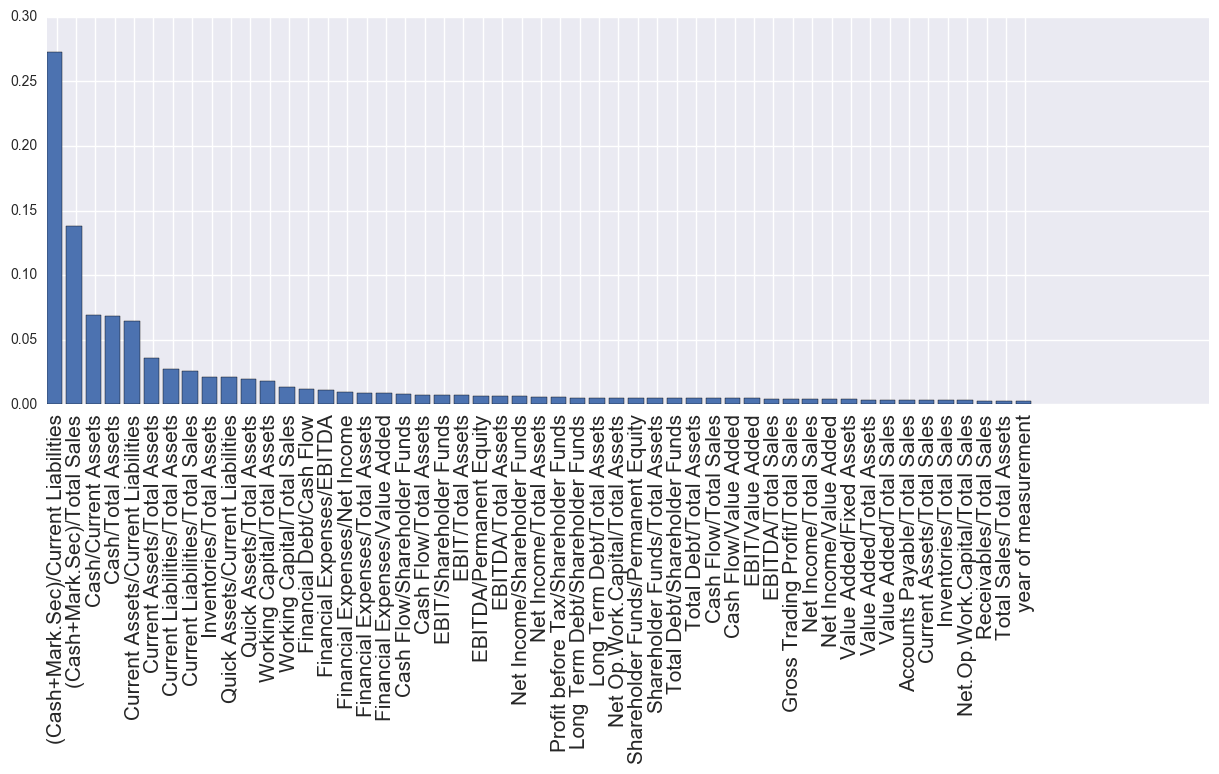

In [115]:
rf = RandomForestClassifier(max_depth=30,criterion='entropy',n_estimators=50,max_features=10)
rf.fit(train_nan_replaced_mean, cible[0].values)
plt.figure(figsize=(15, 5))

ordering = np.argsort(rf.feature_importances_)[::-1][:51]

importances_mean = rf.feature_importances_[ordering]
feature_names = feature_name

x = np.arange(len(feature_names))
plt.bar(x, importances_mean)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

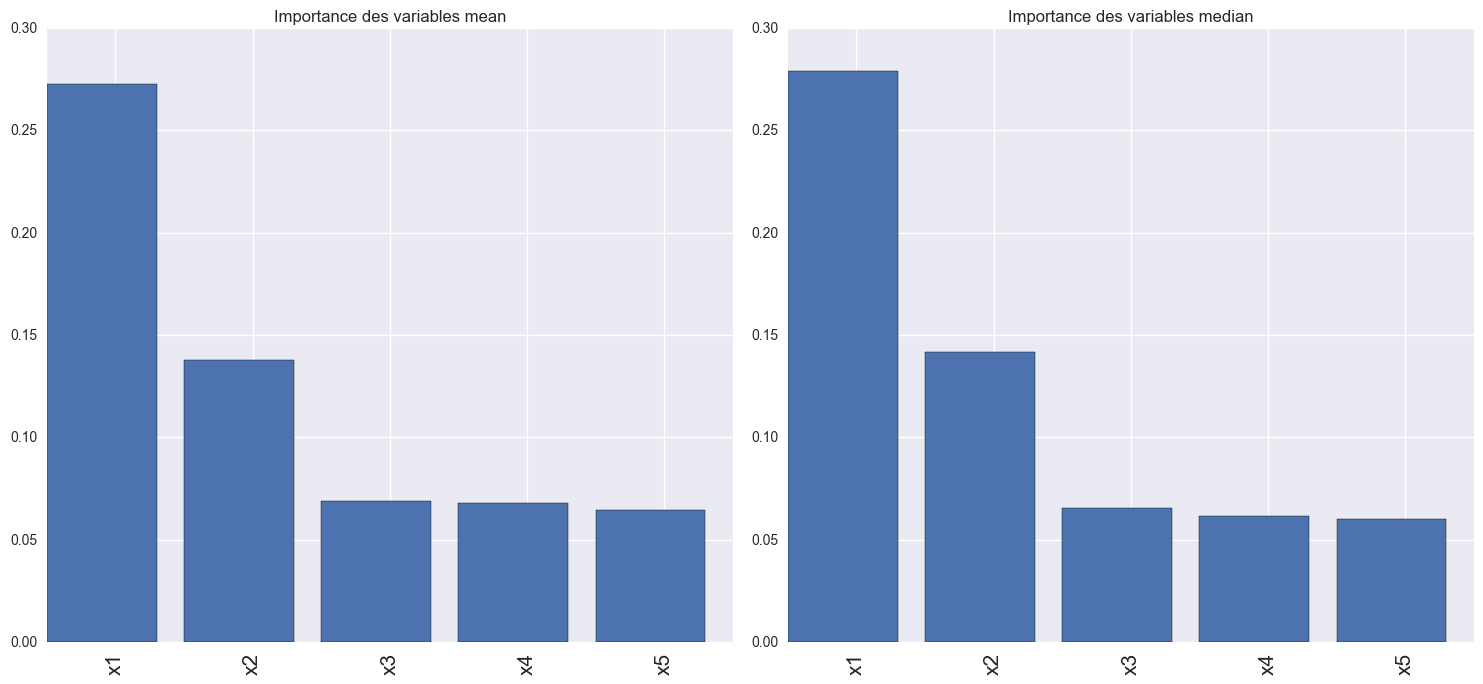

In [134]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
x = np.arange(len(feature_name2))
plt.bar(x[0:5], importances_mean[0:5])
plt.xticks(x[0:5] + 0.5, feature_name2[0:5], rotation=90, fontsize=15);
plt.title('Importance des variables mean')
plt.subplot(1,2,2)
x = np.arange(len(feature_name2))
plt.bar(x[0:5], importances_median[0:5])
plt.xticks(x[0:5] + 0.5, feature_name2[0:5], rotation=90, fontsize=15);
plt.title('Importance des variables median')
plt.tight_layout()

On remarque que les variables importantes sont les 5 première colonnes. On peut supposer que les autres sont trop bruitées. On a aucune information dans ces features à cause du fait qu'on remplace toutes les valeurs manquantes par la même valeur (médiane ou moyenne). On va donc sûrement droit dans le mur si on ne change pas de stratégie, nos résultats sur le test seront sûrement très mauvais. On va changer notre stratégie de remplacement des valeurs manquantes

## Remplacement des valeurs manquantes via les définitions des variables

En fait les variables sont dépendantes de manière non linéaire. De plus on a toutes les valeurs pour les colonnes 0 à 7 (x1 à x8). On peut donc reconstruire certains NaN via leurs relations.

On a : 

$X_{8}=X_{5}X_{9}$ fausse

$X_{10}=\frac{X_{5}}{X_{6}}X_{11}$

$X_{7}=\frac{X_{5}}{X_{6}}X_{46}$

$X_{45}=\frac{X_{6}}{X_{5}}X_{4}$

$X_{29}=\frac{X_{5}}{X_{6}}X_{47}$

$X_{49}=\frac{X_{5}}{X_{6}}$

$X_{43}=\frac{X_{6}}{X_{5}}X_{42}$


Les idées possibles sont les suivantes (pour ne pas tout se tapper à la main...)

On va transformer tout ça en système linéaire via le log. L'idée est de trouver les $\lambda_{j}$ tels que  :
$ln(X_{i})=\sum \limits_{j \neq i}\lambda_{j} ln(X_{j})$. ( Ca revient à dire que les valeurs manquantes sont des regressions linéaires des autres variables après une transformation logarithmique avec normalement les $\lambda_{j}$ soit 0,-1 ou 1)

On peut penser à :
- Tenter de résoudre à la main
- Faire les moindres carrés pour résoudre le système
- Faire une SVD

On regarde si on vérifie bien ces relations avant quand même, avec la deuxième relation par exemple

In [219]:
train_via_def=train
train_via_def.columns=feature_name2
train_via_def.head()

1,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51
0,0.491722,1.264287,-0.158577,-0.150768,1.087627,0.157166,-1.053879,-1.116961,NaN,NaN,NaN,NaN,NaN,-0.235758,NaN,NaN,0.107888,NaN,NaN,-0.047326,-0.399256,0.024927,NaN,NaN,NaN,NaN,NaN,0.164409,NaN,NaN,0.066269,NaN,NaN,NaN,NaN,NaN,NaN,-0.262937,NaN,NaN,0.887558,NaN,NaN,NaN,NaN,NaN,5.284473,NaN,NaN,NaN,2011.0
1,-0.249351,0.046088,-0.040435,0.105421,-1.098919,0.289237,-0.338154,0.129297,0.807200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008015,-0.736507,NaN,-0.417189,NaN,NaN,NaN,-0.657171,NaN,NaN,NaN,NaN,0.445685,NaN,NaN,NaN,NaN,-0.329228,NaN,NaN,NaN,NaN,0.468655,NaN,0.527339,-0.291376,NaN,NaN,NaN,NaN,NaN,2011.0
2,0.986824,-0.189678,0.059693,0.010147,0.777260,-1.051633,-1.011747,-0.756690,NaN,0.874877,-0.273440,0.086508,0.688904,0.011214,NaN,NaN,-0.327590,NaN,0.154479,NaN,0.956582,NaN,NaN,NaN,1.195586,NaN,NaN,NaN,NaN,NaN,0.286557,NaN,NaN,-1.309222,NaN,0.296849,0.264740,NaN,0.513461,NaN,0.404907,-0.271227,NaN,0.995816,0.004617,0.48018,NaN,-0.105363,NaN,NaN,2011.0
3,-0.265990,-0.517960,-0.114526,-0.073818,1.889234,-0.161217,-0.947844,-0.650268,-0.712451,NaN,0.126789,0.596843,NaN,NaN,NaN,NaN,NaN,NaN,-0.081760,NaN,NaN,NaN,-0.455399,-0.077836,NaN,0.271222,NaN,NaN,NaN,0.465727,NaN,NaN,NaN,-1.189501,NaN,NaN,NaN,NaN,NaN,0.117178,NaN,NaN,-0.378151,NaN,NaN,NaN,NaN,NaN,-0.755457,-0.526293,2011.0
4,0.199900,-0.095447,0.263825,0.040790,-1.125166,-1.318912,-0.887661,-1.202686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.624526,0.983099,-1.652295,NaN,NaN,NaN,NaN,NaN,-2.776458,-0.118833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.424390,-0.568337,-0.180425,NaN,NaN,NaN,NaN,NaN,NaN,-0.535741,2011.0


In [223]:
train_via_def['x11'].isnull().sum()

1697

In [224]:
train_via_def['x10'].isnull().sum()

1707

C'est bien dans ce sens là. On regarde si ça pourrait marcher.

In [243]:
for j in range(len(train_via_def['x5'])):            
    if not np.isnan(train_via_def['x11'][j]) and not np.isnan(train_via_def['x10'][j]):
        print('On aurait estimé : ',(train_via_def['x5'][j]*train_via_def['x11'][j])/train['x6'][j])        
        print('La vraie valeur est : ',train_via_def['x10'][j])
        input("Press Enter to continue...")  

On aurait estimé :  0.202099024432
La vraie valeur est :  0.874877271717
Press Enter to continue...
On aurait estimé :  -0.12115676326
La vraie valeur est :  -0.872959124709
Press Enter to continue...
On aurait estimé :  0.979966325525
La vraie valeur est :  2.04953367189
Press Enter to continue...
On aurait estimé :  0.755734005935
La vraie valeur est :  -0.509952575284
Press Enter to continue...
On aurait estimé :  0.555946551318
La vraie valeur est :  -0.782906385671


KeyboardInterrupt: 

Les données sont bruitées !!!! Du coup on a plus les relation entre les variables. Ce qui est très pénible...

In [234]:
x10_esti=[(train_via_def['x5'][j]*train_via_def['x11'][j])/train['x6'][j] for j in range(2400) if np.isnan(train['x10'][j])]

In [235]:
np.where(np.isnan(x10_esti))

(array([   0,    1,    3, ..., 1702, 1703, 1705]),)

### Remplacer les Nan via regression linéaire

In [135]:
train_without_nan=train.dropna()

In [136]:
train_without_nan.shape

(0, 51)

In [ ]:

train_nan_replaced_median[50]=train_nan_replaced_median[50]-2011

### Remplacer les NaN en trouvant toutes les équations